In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# I need to answer the questions:

- Is there a relationship between the number of children and timely loan repayment?  
- Is there a relationship between marital status and timely loan repayment?  
- How do different loan purposes affect timely loan repayment?

## Preparing data for analysis

In [2]:
df = pd.read_csv('./datasets/loan_reliability_project.csv')
print(df.head(5))

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жи

In [3]:
# There was more than 2000 null values in 'days_employed' column which is more than 10% of total values.
median_days_employed = df.loc[df['days_employed'] > 0, 'days_employed'].median()
# I changed missed values to median value because it handles outliers well,
# keeps the data balanced, and ensures the analysis stays accurate
df['days_employed'] = df['days_employed'].fillna(value=median_days_employed)


# Negative values (18080) in 'days_employed' column seems incorrect and I changed them to median too
df.loc[df['days_employed'] <= 0, 'days_employed'] = median_days_employed

# Checking that all the values are grater than 0
print(f"days_employed equals 0 (should be 0): {df.loc[df['days_employed'] <= 0, 'days_employed'].sum()}")

# Making sure the type is correct
print(f"Data types of num cells: {df['days_employed'].dtype, df['dob_years'].dtype, df['total_income'].dtype}")
#float64 int64 float64

# It's more comfortable to work with int numbers in salary column
median_income = df['debt'].median()
df['total_income'] = df['total_income'].fillna(median_income)
print(f"Data types of num cells: {df['total_income'].dtype}")

# Removing NaN in debt
median_debt = df['debt'].median()
df['debt'] = df['debt'].fillna(median_debt)

# Checking num of children
print()
print(f"children values: {df['children'].value_counts()}")


# The value of 20 children seems highly unlikely
median_children = df['children'].median()
df.loc[df['children'] == 20, 'children'] = median_children
# A value of -1 for children is impossible and it will be replaced with median_children
df.loc[df['children'] == -1, 'children'] = 0

days_employed equals 0 (should be 0): 0.0
Data types of num cells: (dtype('float64'), dtype('int64'), dtype('float64'))
Data types of num cells: float64

children values: children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64


In [4]:
# Checking for duplicates in columns education, family_status, income_type, purpose

print(f'education: {df['education'].unique()}')
print(f'family_status: {df['family_status'].unique()}')
print(f'income_type: {df['income_type'].unique()}')
print(f'purpose: {df['purpose'].unique()}')

# There are duplicates in education and purpose columns

# To lowcase
df.loc[:, 'education'] = df.loc[:, 'education'].str.lower()

print()
print(f'education: {df['education'].unique()}')

education: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
family_status: ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
income_type: ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
purpose: ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимость

In [5]:
# I'd like to create a new column to group the data from 'purpose' column

def categorize_purpose(purpose):
    purpose = purpose.lower().strip()
    if 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'недвижимост' in purpose:
        return 'операции с недвижимостью'
    elif 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образован' in purpose:
        return 'получение образования'
    else:
        return 'прочее'

df['purpose_categories'] = df['purpose'].apply(categorize_purpose)

print(f'purpose_categories: {df['purpose_categories'].unique()}')

# Check if all categories are collected
if df.loc[df['purpose_categories'] == 'прочее'].shape[0] == 0:
    print('All the purposes are categorized')
else:
    print(df.loc[df['purpose_categories'] == 'прочее'])    

purpose_categories: ['операции с недвижимостью' 'операции с автомобилем'
 'получение образования' 'проведение свадьбы']
All the purposes are categorized


## The original sheet is ready for analysis. The next step is decomposition and create reference tables

In [6]:
print(df.head(5))

   children  days_employed  dob_years education  education_id  \
0         1  365213.306266         42    высшее             0   
1         1  365213.306266         36   среднее             1   
2         0  365213.306266         33   среднее             1   
3         3  365213.306266         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose        purpose_categories  
0               покупка жилья  операции с недвижимостью  
1     

In [7]:
# Creating reference tables
education_df = df[['education', 'education_id']].drop_duplicates().reset_index(drop=True)
family_status_df = df[['family_status', 'family_status_id']].drop_duplicates().reset_index(drop=True)

# Removing extra data from the df
df.drop(columns=['education_id', 'family_status'], inplace=True)

print(education_df)
print()
print(family_status_df)

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4

           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  Не женат / не замужем                 4


In [8]:
print(df.head(5))

   children  days_employed  dob_years education  family_status_id gender  \
0         1  365213.306266         42    высшее                 0      F   
1         1  365213.306266         36   среднее                 0      F   
2         0  365213.306266         33   среднее                 0      M   
3         3  365213.306266         32   среднее                 0      M   
4         0  340266.072047         53   среднее                 1      F   

  income_type  debt   total_income                     purpose  \
0   сотрудник     0  253875.639453               покупка жилья   
1   сотрудник     0  112080.014102     приобретение автомобиля   
2   сотрудник     0  145885.952297               покупка жилья   
3   сотрудник     0  267628.550329  дополнительное образование   
4   пенсионер     0  158616.077870             сыграть свадьбу   

         purpose_categories  
0  операции с недвижимостью  
1    операции с автомобилем  
2  операции с недвижимостью  
3     получение образовани

## Analysis:

## relationship between the number of children and timely loan repayment

  children  count   sum debt_ratio
             debt  debt           
0        0  14272  1072   7.511211
1        1   4818   444   9.215442
2        2   2055   194   9.440389
3        3    330    27   8.181818
4        4     41     4   9.756098
5        5      9     0   0.000000



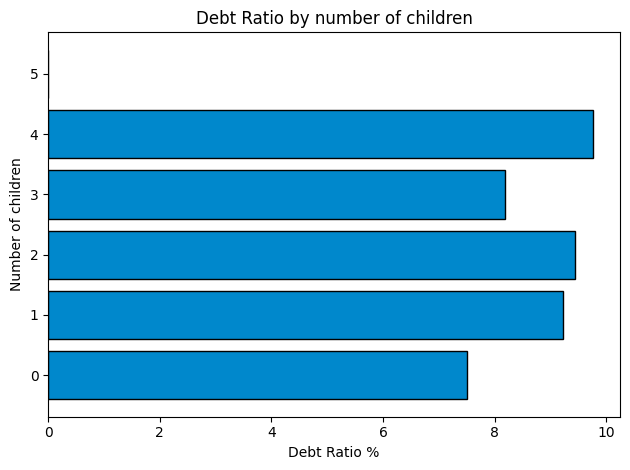

In [14]:
pivot_children = df.pivot_table(
    index='children', 
    values='debt', 
    aggfunc=['count', 'sum']
).reset_index()
pivot_children['debt_ratio'] = pivot_children['sum'] / pivot_children['count'] * 100

print(pivot_children)
print()
plt.barh(pivot_children['children'], pivot_children['debt_ratio'], color='#0088cc', edgecolor='black')
plt.title('Debt Ratio by number of children')
plt.xlabel('Debt Ratio %')
plt.ylabel('Number of children')
plt.tight_layout()
plt.show()

## relationship between marital status and timely loan repaymen

   family_status_id  total_clients  total_debtors  debt_ratio
0                 0          12380            931    7.520194
1                 1           4177            388    9.288963
2                 2            960             63    6.562500
3                 3           1195             85    7.112971
4                 4           2813            274    9.740491



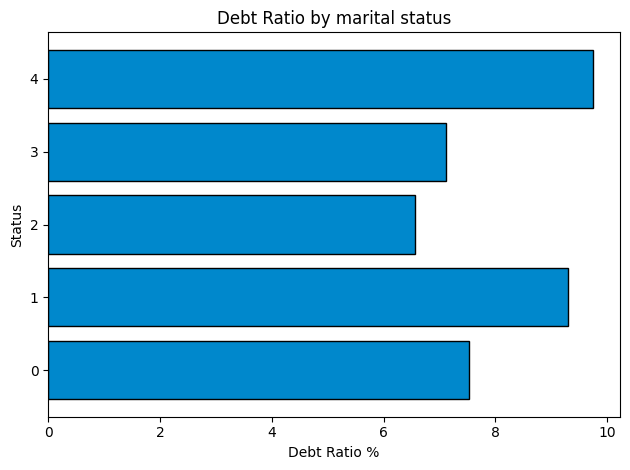

In [13]:
marital_grouped = df.groupby('family_status_id').agg(
    total_clients=('debt', 'count'),
    total_debtors=('debt', 'sum')
).reset_index()
marital_grouped['debt_ratio'] = marital_grouped['total_debtors'] / marital_grouped['total_clients'] * 100

print(marital_grouped)
print()
plt.barh(marital_grouped['family_status_id'], marital_grouped['debt_ratio'], color='#0088cc', edgecolor='black')
plt.title('Debt Ratio by marital status')
plt.xlabel('Debt Ratio %')
plt.ylabel('Status')
plt.tight_layout()
plt.show()

## loan purposes affect timely loan repayment

         purpose_categories  total_credits  total_debts  debt_ratio
0    операции с автомобилем           4315          403    9.339513
1     получение образования           4022          370    9.199403
2        проведение свадьбы           2348          186    7.921635
3  операции с недвижимостью          10840          782    7.214022



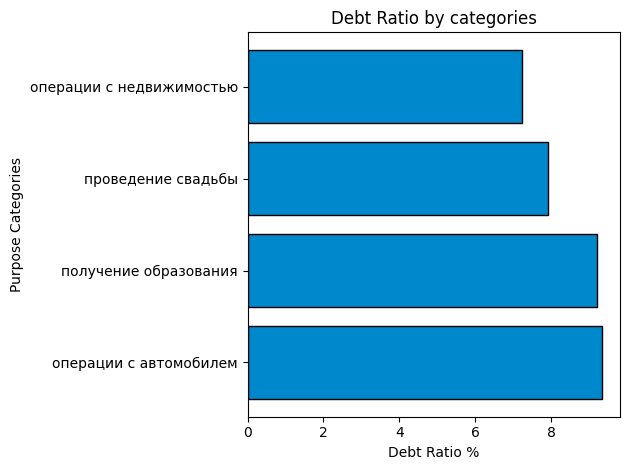

In [11]:
debt_analysis = pd.DataFrame({
    'total_credits': df.groupby('purpose_categories')['debt'].count(),  
    'total_debts': df.groupby('purpose_categories')['debt'].sum(),   
    'debt_ratio': df.groupby('purpose_categories')['debt'].sum() / df.groupby('purpose_categories')['debt'].count() * 100
}).sort_values(by='debt_ratio', ascending=False).reset_index()

print(debt_analysis)
print()


plt.barh(debt_analysis['purpose_categories'], debt_analysis['debt_ratio'], color='#0088cc', edgecolor='black')
plt.title('Debt Ratio by categories')
plt.xlabel('Debt Ratio %')
plt.ylabel('Purpose Categories')
plt.tight_layout()
plt.show()

# Overall:

### - Is there a relationship between the number of children and timely loan repayment?  
- Families with 0 children have the largest number of loans (14,272), but their percentage of debt is the lowest (7.51%).
- Families with 4 children make up the smallest group (41 clients), but they have the highest percentage of arrears (9.76%).
- Families with 1-3 children are in the middle range both in terms of the number of clients and the percentage of arrears.
 
Families without children are more likely to repay the loan.

### - Is there a relationship between marital status and timely loan repayment?  
- People in a civil marriage or unmarried (status 1, 4): The highest debt Ratio. They probably have poorer financial stability or a higher risk of insecurity.
- Married (status 0): The lowest debt ratio. Marriage can increase financial stabilit.
- Widows or divorced (for example, status 2 or 3) Moderate debt ratio, but better than that of civil marriages.

Marriage has a positive effect on creditworthiness.

### - How do different loan purposes affect timely loan repayment?
- Real estate loans are the most stable loans with the lowest percentage of arrears.
- Car loans are more difficult to repay